# Name : *Mariam Bebawy*  
## Track : *Data Science & Business Analytics*  

### Task 7 : *Stock Market Prediction Using Numerical and Textual Analysis*  
create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines  
stock to analyze and predict - SENSEX (S&P BSE SENSEX)

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
headlines = pd.read_csv('./india-news-headlines.csv')
print(headlines.shape)
headlines.head()

(3650970, 3)


,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [3]:
headlines.columns = ['date', 'category', 'text']
headlines['date'] = pd.to_datetime(headlines['date'],format='%Y%m%d')
headlines['text'] = headlines['text'].str.lower()
headlines.head()

,date,category,text
0,2001-01-02,unknown,status quo will not be disturbed at ayodhya; s...
1,2001-01-02,unknown,fissures in hurriyat over pak visit
2,2001-01-02,unknown,america's unwanted heading for india?
3,2001-01-02,unknown,for bigwigs; it is destination goa
4,2001-01-02,unknown,extra buses to clear tourist traffic


In [4]:
print(headlines.isnull().sum(), '\n')
headlines.info()

date        0
category    0
text        0
dtype: int64 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650970 entries, 0 to 3650969
Data columns (total 3 columns):
 #   Column    Dtype         
---  ------    -----         
 0   date      datetime64[ns]
 1   category  object        
 2   text      object        
dtypes: datetime64[ns](1), object(2)
memory usage: 83.6+ MB


In [5]:
hl_categories = headlines['category'].unique()
print(len(hl_categories))
hl_categories

1041


array(['unknown', 'entertainment.hindi.bollywood', 'india', ...,
       'sports.football.euro-2021', 'business.markets.ipo',
       'sports.tokyo-olympics.india-in-tokyo'], dtype=object)

In [6]:
from pandas_datareader import data

df = data.DataReader('^BSESN', 'yahoo')
print(df.shape)
df.head()

(1231, 6)


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-07-19,31978.890625,31793.720703,31882.800781,31955.349609,11300.0,31955.349609
2017-07-20,32057.119141,31859.500000,32033.820312,31904.400391,11200.0,31904.400391
2017-07-21,32062.230469,31808.929688,32035.880859,32028.890625,18000.0,32028.890625
2017-07-24,32320.859375,32058.330078,32100.220703,32245.869141,11500.0,32245.869141
2017-07-25,32374.300781,32196.859375,32350.710938,32228.269531,14100.0,32228.269531


In [7]:
mini_df = (df.index.min()).to_datetime64()
maxi_df = (df.index.max()).to_datetime64()
print(mini_df, maxi_df)
mini_hl = headlines.date.min()
maxi_hl = headlines.date.max()
print(mini_hl, maxi_hl)

2017-07-19T00:00:00.000000000 2022-07-18T00:00:00.000000000
2001-01-02 00:00:00 2022-03-31 00:00:00


In [8]:
hl_sub = headlines.loc[(headlines['date'] >= mini_df) & (headlines['date'] <= maxi_hl)]
hl_sub.reset_index(inplace=True)
df_sub = df.loc[(df.index >= mini_df) & (df.index <= maxi_hl)]

In [9]:
hl_sub

,index,date,category,text
0,2689017,2017-07-19,city.puducherry,big names in india & us inc root for an indepe...
1,2689018,2017-07-19,city.coimbatore,mrts or brts; confusion reigns
2,2689019,2017-07-19,entertainment.hindi.bollywood,india's youngest superhero has a nose for figh...
3,2689020,2017-07-19,entertainment.hindi.bollywood,meet the crazy; quirky & colourful 'mubarakan'...
4,2689021,2017-07-19,city.delhi,the latest print in this year's kite fashion: ...
...,...,...,...,...
961948,3650965,2022-03-31,city.srinagar,j&k sacks 2 cops; 3 other employees over terro...
961949,3650966,2022-03-31,entertainment.hindi.bollywood,ranbir kapoor says 'rishi kapoor enjoyed his a...
961950,3650967,2022-03-31,city.trichy,as covid-19 cases drop to nil in southern dist...
961951,3650968,2022-03-31,city.erode,tamil nadu sees marginal rise of covid cases w...


In [10]:
df_sub

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-07-19,31978.890625,31793.720703,31882.800781,31955.349609,11300.0,31955.349609
2017-07-20,32057.119141,31859.500000,32033.820312,31904.400391,11200.0,31904.400391
2017-07-21,32062.230469,31808.929688,32035.880859,32028.890625,18000.0,32028.890625
2017-07-24,32320.859375,32058.330078,32100.220703,32245.869141,11500.0,32245.869141
2017-07-25,32374.300781,32196.859375,32350.710938,32228.269531,14100.0,32228.269531
...,...,...,...,...,...,...
2022-03-25,57845.371094,57100.238281,57801.718750,57362.199219,6900.0,57362.199219
2022-03-28,57638.339844,56825.089844,57472.718750,57593.488281,6300.0,57593.488281
2022-03-29,58001.531250,57639.351562,57814.761719,57943.648438,12100.0,57943.648438


In [11]:
print(df_sub.shape, '\n')
print(df_sub.info())
df_sub.describe()

(1157, 6) 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1157 entries, 2017-07-19 to 2022-03-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1157 non-null   float64
 1   Low        1157 non-null   float64
 2   Open       1157 non-null   float64
 3   Close      1157 non-null   float64
 4   Volume     1157 non-null   float64
 5   Adj Close  1157 non-null   float64
dtypes: float64(6)
memory usage: 63.3 KB
None


,High,Low,Open,Close,Volume,Adj Close
count,1157.000000,1157.000000,1157.000000,1157.000000,1.157000e+03,1157.000000
mean,41658.243663,41142.145223,41453.768800,41400.150171,2.888394e+05,41400.150171
std,8808.820279,8728.890157,8780.872873,8780.231387,2.187918e+06,8780.231387
min,27462.869141,25638.900391,26499.810547,25981.240234,1.000000e+02,25981.240234
25%,35254.878906,34910.339844,35128.160156,35081.820312,9.800000e+03,35081.820312
50%,38513.691406,38066.128906,38348.390625,38276.628906,1.460000e+04,38276.628906
75%,48887.851562,48152.238281,48569.121094,48564.269531,2.060000e+04,48564.269531
max,62245.429688,61624.648438,62156.480469,61765.589844,3.181510e+07,61765.589844


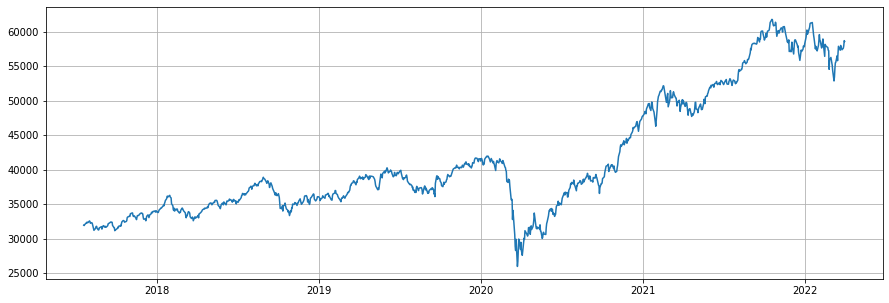

In [12]:
plt.figure(figsize=(15,5))
plt.plot(df_sub['Close'])
plt.grid(True)

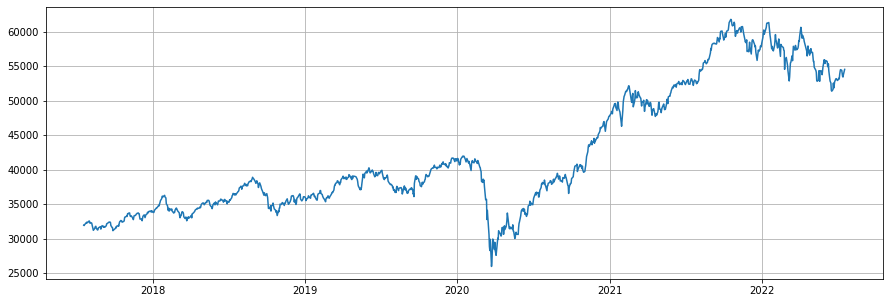

In [13]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.grid(True)

In [14]:
close_sub = df_sub['Close']

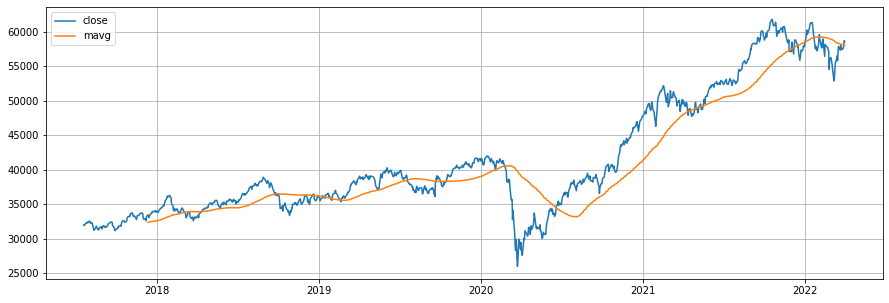

In [15]:
# examining rolling mean of stocks
# window = 100 ----> mean of last 100 days
m_avg = close_sub.rolling(window=100).mean()

plt.figure(figsize=(15,5))
plt.plot(close_sub, label='close')
plt.plot(m_avg, label='mavg')
plt.legend()
plt.grid(True)

In [16]:
# buy during downturn
# sell during upturn

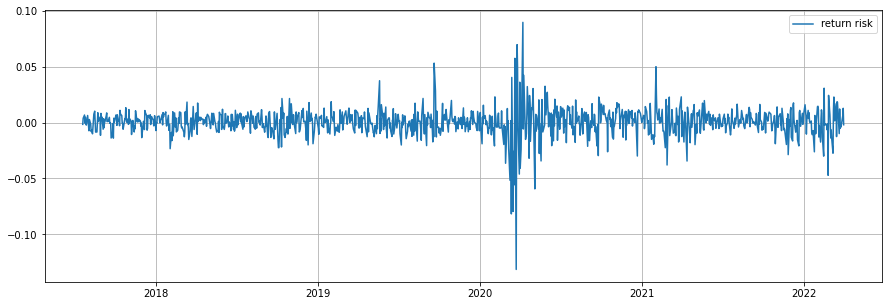

In [17]:
# examining return deviation to determine risk and return
ret = close_sub / close_sub.shift(1) - 1

plt.figure(figsize=(15,5))
plt.plot(ret, label='return risk')
plt.legend()
plt.grid(True)

In [18]:
# stock experiencecs more than 10% drop in 2020
# relatively high risk

In [19]:
# predicting stock prices using machine learning models
# Linear Analysis / Quadratic Discriminant Analysis QDA / K Nearest Neighbour KNN

# feature engineering
# high low percentage / percentage change

In [20]:
dfreg = df.loc[:,['Adj Close','Volume']]
dfreg['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
dfreg['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0
dfreg.head()

,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,
2017-07-19,31955.349609,11300.0,0.579465,0.227548
2017-07-20,31904.400391,11200.0,0.619410,-0.404010
2017-07-21,32028.890625,18000.0,0.790851,-0.021820
2017-07-24,32245.869141,11500.0,0.814149,0.453730
2017-07-25,32228.269531,14100.0,0.550577,-0.378481


In [21]:
# Pre-processing & Cross Validation
# 1- Drop missing value
# 2- Separating the label here, we want to predict the AdjClose
# 3- Scale the X so that everyone can have the same distribution for linear regression
# 4- Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
# 5- Separate label and identify it as y
# 6- Separation of training and testing of model by cross validation train test split

In [23]:
import math
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [24]:
# Drop missing value
dfreg.fillna(value=-99999, inplace=True)

print(dfreg.shape)
# We want to separate 1 percent of the data to forecast
forecast_out = int(math.ceil(0.01 * len(dfreg)))

# Separating the label here, we want to predict the AdjClose
forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
X = np.array(dfreg.drop(['label'], 1))

# Scale the X so that everyone can have the same distribution for linear regression
X = preprocessing.scale(X)

# Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

# Separate label and identify it as y
y = np.array(dfreg['label'])
y = y[:-forecast_out]

print('Dimension of X',X.shape)
print('Dimension of y',y.shape)

(1231, 4)
Dimension of X (1218, 4)
Dimension of y (1218,)


C:\Users\Mars\AppData\Local\Temp/ipykernel_5524/1776639318.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(dfreg.drop(['label'], 1))


In [25]:
# Separation of training and testing of model by cross validation train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [27]:
# Linear regression
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)

# Quadratic Regression 2
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X_train, y_train)

# Quadratic Regression 3
clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(X_train, y_train)
    
# KNN Regression
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [28]:
# evaluating models
confidencereg = clfreg.score(X_test, y_test)
confidencepoly2 = clfpoly2.score(X_test,y_test)
confidencepoly3 = clfpoly3.score(X_test,y_test)
confidenceknn = clfknn.score(X_test, y_test)

print("The linear regression confidence is ",confidencereg)
print("The quadratic regression 2 confidence is ",confidencepoly2)
print("The quadratic regression 3 confidence is ",confidencepoly3)
print("The knn regression confidence is ",confidenceknn)

The linear regression confidence is  0.9758308695574508
The quadratic regression 2 confidence is  0.9755177450844624
The quadratic regression 3 confidence is  0.9732471156312082
The knn regression confidence is  0.9550378175514239


In [33]:
# Printing the forecast
forecast_set = clfreg.predict(X_lately)
dfreg['Forecast'] = np.nan
print('linear regression: \n', forecast_set, confidencereg, forecast_out, '\n')

forecast_set = clfpoly2.predict(X_lately)
dfreg['Forecast'] = np.nan
print('quadratic regression 2: \n', forecast_set, confidencepoly2, forecast_out, '\n')

forecast_set = clfpoly3.predict(X_lately)
dfreg['Forecast'] = np.nan
print('quadratic regression 3: \n', forecast_set, confidencepoly3, forecast_out, '\n')

forecast_set = clfknn.predict(X_lately)
dfreg['Forecast'] = np.nan
print('knn regression: \n', forecast_set, confidenceknn, forecast_out, '\n')

linear regression: 
 [53028.84915792 52936.34625129 53252.92312221 53142.04953054
 53766.62900901 54158.561591   54454.15299957 54378.70500287
 53865.88500594 53504.42373067 53416.71286841 53755.56890069
 54513.63642654] 0.9758308695574508 13 

quadratic regression 2: 
 [53080.45434174 52961.81888364 53283.73261777 53186.73193678
 53757.59799663 54197.74756852 54488.95375535 54410.10108691
 53900.32969269 53544.23177732 53459.47614475 53797.28092435
 54523.54229865] 0.9755177450844624 13 

quadratic regression 3: 
 [53842.03196505 53218.93689074 54106.94364792 53734.06869916
 54735.4422216  54949.06021882 55190.3605275  55093.18964997
 54724.32523923 54509.31058744 54044.56093652 54536.04139168
 55363.86937613] 0.9732471156312082 13 

knn regression: 
 [53044.3046875  52781.21484375 53008.46875    52149.2265625
 56704.1640625  52878.16015625 54668.41015625 54715.57617188
 53148.07421875 51699.0859375  51712.13085938 55201.95507812
 54674.1640625 ] 0.9550378175514239 13 



In [34]:
import datetime

In [35]:
last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_set:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]

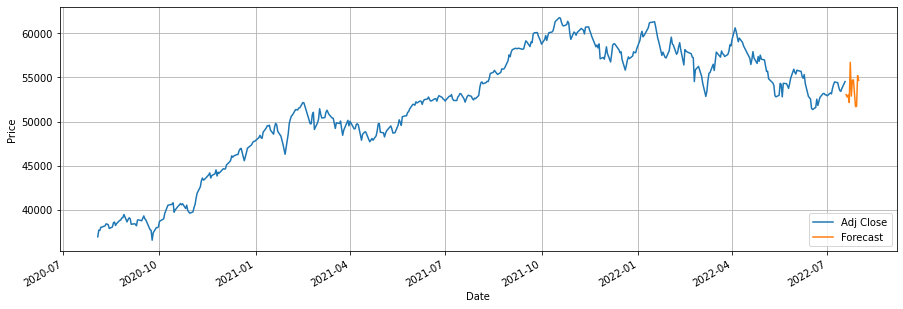

In [37]:
plt.figure(figsize=(15,5))
dfreg['Adj Close'].tail(500).plot()
dfreg['Forecast'].tail(500).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()